##### <a href='#section1'>1. Загрузка файлов с данными и изучение общей информации.</a>

##### <a href='#section2'>2. Подготовка данных.</a>
* <a href='#section21' >2.1 Приведение данных к нужным типам.</a>
* <a href='#section22'>2.2 Исправление ошибок в данных.</a>
* <a href='#section23'>2.3 Подсчет данных по каждому пользователю(звонки, минуты, сообщения, трафик, выручка).</a>

##### <a href='#section3'>3. Анализ данных.</a>


##### <a href='#section4'>4. Проверка гипотез.</a>


##### <a href='#section5'>5. Общий вывод.</a>

### <a id='section1'>1. Загрузка файлов с данными и изучение общей информации</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Загружаем данные
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Как видим, 38 пользователей прекратили пользование тарифами, также необходимо будет привести столбцы с датами к правильному типу данных.

In [5]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Здесь также необходимо будет привести к своим типам столбцы: 'call_date', 'id', 'duration'. Длительность еще и округлить вверх, по условиям заданным оператором.

In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Здесь все также: даты и 'id' надо будет привести к нужному типу данных. 

In [9]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Такая же проблема видится как и в предудыщей таблице(даты и id)

In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В тарифах ошибок нет, таблицу не будем подвергать изменениям.

### <a id='section2'>2. Подготовка данных</a>

<a id='section21'>2.1 Приведение данных к нужным типам</a>

In [13]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['id'] = calls['id'].astype('int')
calls['duration'] = calls['duration'].astype('int')

messages['id'] = messages['id'].astype('int')
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

internet['id'] = internet['id'].astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

<a id='section22'>2.2 Исправление ошибок в данных</a>

In [ ]:
#округлим длительность звонков вверх
calls['duration'] = calls['duration'].apply(np.ceil)
#Предполоижим что нулевые звонки это звонки длительностью в до 1 минуты и роль сыграло такое округление в программе оператора, 
#заменим 0 на 1.
calls['duration'] = calls['duration'].replace(0, 1)
#исправим название колонки для удобства в дальнейшей работе
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

<a id='section23'>2.3 Подсчет данных по каждому пользователю</a>

Количество сделанных звонков и израсходованных минут разговора по месяцам

In [15]:
#считаем количество звонков и израсходованных минут по месяцам:
calls['month'] = calls['call_date'].dt.month
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'calls_duration','id':'calls_total'})
user_calls.head()

,user_id,month,calls_duration,calls_total
0,1000,5,148.00,22
1,1000,6,160.00,43
2,1000,7,307.00,47
3,1000,8,378.00,52
4,1000,9,436.00,58


In [16]:
#теперь количество сообщений
messages['month'] = messages['message_date'].dt.month
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total'})
user_messages.head()

,user_id,month,sms_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [17]:
internet['month'] = internet['session_date'].dt.month
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total'})
user_internet.head()

,user_id,month,mb_total
0,1000,5,"2,253.49"
1,1000,6,"23,233.77"
2,1000,7,"14,003.64"
3,1000,8,"14,055.93"
4,1000,9,"14,568.91"


In [18]:
#подсчитаем месячную выручку с каждого пользователя
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df = df.merge(users, on='user_id', how='left')
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,calls_duration,calls_total,sms_total,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,148.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,160.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,307.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,378.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,436.00,58.00,57.00,"14,568.91",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [19]:
# проверим новую таблицу на пропуски
df.isna().sum()

user_id                     0
month                       0
calls_duration             40
calls_total                40
sms_total                 497
mb_total                   11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [20]:
# и тут же их заменим нулями
df['sms_total'] = df['sms_total'].fillna(0)
df['mb_total'] = df['mb_total'].fillna(0)
df['month_calls'] = df['calls_duration'].fillna(0)
df['calls_total'] = df['calls_total'].fillna(0)

In [21]:
#напишем функцию для подсчета выручки за месяц
def revenue(row):
    sms = (row['sms_total'] - row['messages_included']) * row['rub_per_message']
    mins = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['mb_total'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [22]:
df.head()

,user_id,month,calls_duration,calls_total,sms_total,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_calls
0,1000,5,148.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,148.00
1,1000,6,160.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,160.00
2,1000,7,307.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,307.00
3,1000,8,378.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,378.00
4,1000,9,436.00,58.00,57.00,"14,568.91",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,436.00


In [23]:
df['revenue'] = df.apply(lambda x: revenue(x), axis=1)
df['total_paid'] = df['rub_monthly_fee'] + df['revenue']
df.sort_values(by='total_paid').tail()

,user_id,month,calls_duration,calls_total,sms_total,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_calls,revenue,total_paid
1793,1286,12,676.00,95.00,68.00,"35,108.07",19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15360,500,550,200,3,3,676.00,"4,440.00","4,990.00"
260,1042,12,669.00,121.00,75.00,"37,165.69",42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15360,500,550,200,3,3,669.00,"4,841.00","5,391.00"
3105,1486,11,709.00,108.00,96.00,"36,266.11",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,709.00,"4,849.00","5,399.00"
1622,1261,12,999.00,141.00,22.00,"32,650.91",46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3,999.00,"4,875.00","5,425.00"
3106,1486,12,921.00,133.00,83.00,"38,552.45",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,921.00,"5,892.00","6,442.00"


### <a id='section3'>3. Анализ данных</a>

In [24]:
#сравним общий платеж с абонентской платой на тарифах
df[['revenue', 'total_paid']].describe()

,revenue,total_paid
count,"3,214.00","3,214.00"
mean,474.66,"1,453.72"
std,706.34,776.25
min,0.00,550.00
25%,0.00,647.50
50%,68.00,"1,492.50"
75%,795.75,"1,950.00"
max,"5,892.00","6,442.00"


In [25]:
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

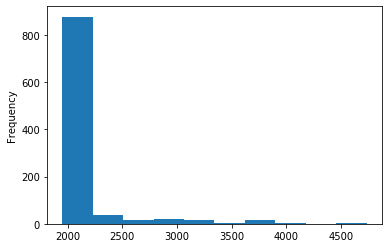

In [26]:
df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10)
plt.show()

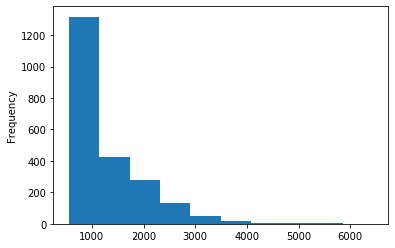

In [27]:
df[df['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10)
plt.show()

In [28]:
df.groupby('tariff').agg({'total_paid':['median','mean','var','std']}).style.format("{:.2f}")

Вывод: по тарифу "Ультра" абоненты в основном укладываются в абонентскую плату, в тоже время на "Смарте" довольно чаще платять суммы превыщающие ее. 

In [29]:
#теперь изучим длительность звонков
df.groupby('tariff').agg({'calls_duration':['median','mean','var','std']}).style.format("{:.2f}")

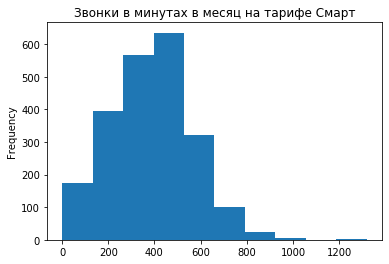

In [30]:
df[df['tariff'] == 'smart']['calls_duration'].plot(kind='hist', bins=10)
plt.title('Звонки в минутах в месяц на тарифе Смарт')
plt.show()

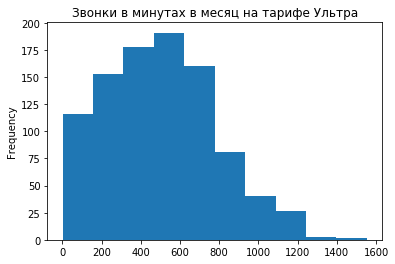

In [31]:
df[df['tariff'] == 'ultra']['calls_duration'].plot(kind='hist', bins=10)
plt.title('Звонки в минутах в месяц на тарифе Ультра')
plt.show()

Вывод: на "Смарте" в абонентской плате предусмотрено 500 бесплатных минут и практически все их абоненты выговаривают. В "Ультра" наоборот, каждый месяц невыговоренными остается большое количество минут. Медиана и среднее значение находятся рядом на обоих тарифах.

In [32]:
#проанализируем интернет трафик
df.groupby('tariff').agg({'mb_total':['median','mean','var','std']}).style.format("{:.2f}")

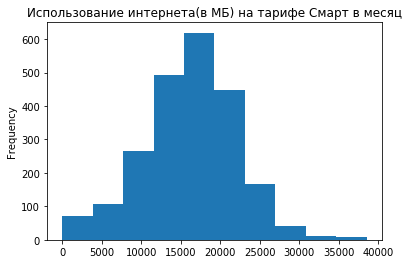

In [33]:
df[df['tariff'] == 'smart']['mb_total'].plot(kind='hist', bins=10)
plt.title('Использование интернета(в МБ) на тарифе Смарт в месяц')
plt.show()

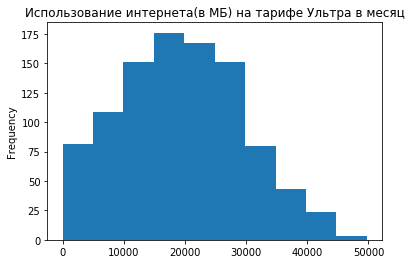

In [34]:
df[df['tariff'] == 'ultra']['mb_total'].plot(kind='hist', bins=10)
plt.title('Использование интернета(в МБ) на тарифе Ультра в месяц')
plt.show()

Вывод: здесь также среднее и медиана очень близко лежат. Абонентам "Смарт" явно не хватает включенного трафика в абонплату, на "Ультре" у всех опять огромные запасы остаются.

In [35]:
#теперь смотри смс
df.groupby('tariff').agg({'sms_total':['median','mean','var','std']}).style.format("{:.2f}")

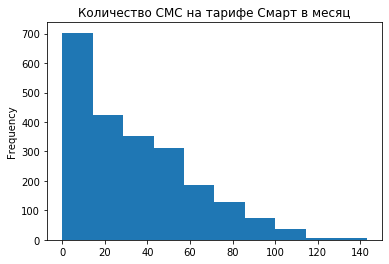

In [36]:
df[df['tariff'] == 'smart']['sms_total'].plot(kind='hist', bins=10)
plt.title('Количество СМС на тарифе Смарт в месяц')
plt.show()

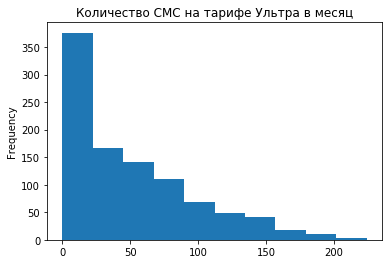

In [37]:
df[df['tariff'] == 'ultra']['sms_total'].plot(kind='hist', bins=10)
plt.title('Количество СМС на тарифе Ультра в месяц')
plt.show()

Здесь все также как и в предыдущих пунктах. СМС-ки теряют свою популярность из-за мессенджеров. Возможно стоит пересмотреть распределение бесплатных смс по тарифам, разбежка в 20 раз явно непродуманная.

### <a id='section4'>4. Проверка гипотез</a>

In [38]:
#функция для удаления выбросов
def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

Сравнимые выборки независимы между собой, поэтому для использования возьмем t-критерий Стьюдента.

#### Гипотеза о равенстве средних двух генеральных совокупностей №1

Сформулируем гипотезы:

* H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
* H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [39]:
ultra = df[df['tariff'] == 'ultra']
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

smart = df[df['tariff'] == 'smart']
smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']

alpha = 0.05

results = st.ttest_ind(ultra, smart)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.749392599491863e-248
Отвергаем нулевую гипотезу


Вывод: между выборками существуют значимые различия, поэтому разници не случайна.

#### Гипотеза о равенстве средних двух генеральных совокупностей №2

Сформулируем гипотезы:

* H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
* H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [40]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [41]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Провинция')

moscow = df[df['region'] == 'Москва']
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

province = df[df['region'] == 'Провинция']
province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

results = st.ttest_ind(moscow, province)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2276099474667653
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 22% такой результат может быть получен случайно. Значимых различий нет.

### <a id='section5'>5.Общий вывод</a>

Как видно по поведению пользователей на тарифах, они довольно сильно различаются: кому-то необходим только интернет, а кто-то использует все запасы смс и выговаривает все бесплатные минуты. Тут нельзя найти какой-то баланс, ведь все люди разные. 

Замечания по тарифу "Смарт":
* есть заметная переплата, бонусы, включенные в абонентскую плату небольшие и быстро заканчиваются.
* необходимо добавить бесплатных мегабайт интернет-трафика
* немного увеличить количество включенных бесплатных минут
* уменьшить цену услуг вне включенных в пакет

Замечания по тарифу "Ультра":
* сократить частично минуты, смс и включенных трафик
* за счет этого ввести какой-то дополнительный бонус
* либо уменьшить немного абонентскую плату, что возможно поможет переманить на него часть клиентов со "Смарта"

#### Тарифы приносят разные по размерам деньги, хотя это и подразумевалось изначально, так как они заточены под разные аудитории. 

#### Абоненты из Москвы и регионов приносят примерно одинаковую выручку компании, скорее всего это связано со стандартным набором услуг мобильной связи, который довольно схож для людей разного социального и имущественного статуса.